# Распознавание моделей одежды из набора данных Fashion MNIST

Используем сверточные нейронные сети для распознавания Fashion MNIST

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

Учебный курс "[Программирование глубоких нейронных сетей на Python](https://www.asozykin.ru/courses/nnpython)".

<a target="_blank" href="https://colab.research.google.com/github/sozykin/dlpython_course/blob/master/cnn/fashion_mnist.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [16]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Rescaling
from tensorflow.keras.layers import Dropout, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

## Подготовка данных для обучения сети

**Загружаем набор данных**

In [8]:
# В Keras встроены средства работы с популярными наборами данных
# (x_train, y_train) - набор данных для обучения
# (x_test, y_test) - набор данных для тестирования
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Список с названиями классов

In [9]:
classes = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']

Просматриваем примеры изображений

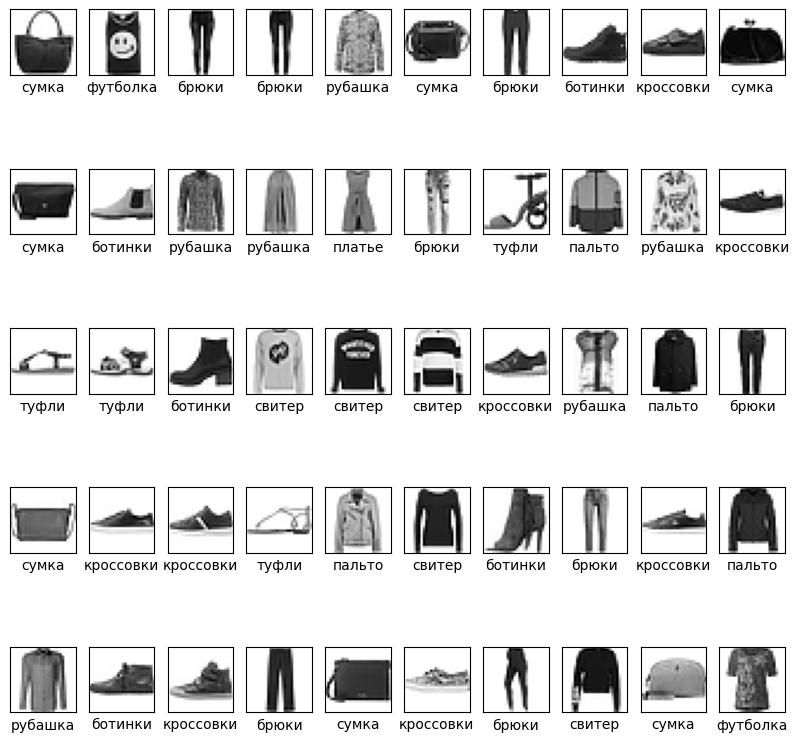

In [10]:
plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

## Создаем нейронную сеть

**Создаем последовательную модель**

In [ ]:
# Создаем последовательную модель
model = Sequential(
    [
        # Указываем размерность изображений
        Input(shape=(28, 28, 1)),
        # Предварительная обработка: нормализация
        Rescaling(1./255),
        # Первый сверточный слой
        Conv2D(32, (3, 3), padding='same', activation='relu'),
        # Первый слой подвыборки
        MaxPooling2D(pool_size=(2, 2)),
        # Слой регуляризации Dropout
        Dropout(0.2),

        # Второй сверточный слой
        Conv2D(64, (3, 3), padding='same', activation='relu'),
        # Второй слой подвыборки
        MaxPooling2D(pool_size=(2, 2)),
        # Слой регуляризации Dropout
        Dropout(0.2),

        # Третий сверточный слой
        Conv2D(128, (3, 3), padding='same', activation='relu'),
        # Третий слой подвыборки
        MaxPooling2D(pool_size=(2, 2)),
        # Слой регуляризации Dropout
        Dropout(0.2),

        # Слой преобразования данных из 2D представления в плоское
        Flatten(),
        # Полносвязный слой для классификации
        Dense(256, activation='relu'),
        # Слой регуляризации Dropout
        Dropout(0.2),
        # Выходной полносвязный слой
        Dense(10, activation='softmax')
    ]
)

**Компилируем сеть**

In [54]:
model.compile(loss="sparse_categorical_crossentropy", # Функция потерь, нужно преобразовывать метки в формат one hot encoding
              optimizer="adamw",                       # Оптимизатор
              metrics=["accuracy"])    


In [55]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_7 (Rescaling)         │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 584,170 (2.23 MB)

 Trainable params: 584,170 (2.23 MB)

 Non-trainable params: 0 (0.00 B)

## Обучаем нейронную сеть

In [56]:
history = model.fit(x_train,              # Данные для обучения
                    y_train,              # Правильные ответы
                    batch_size=200,       # Размер мини-выборки
                    epochs=50,            # Количество эпох обучения
                    validation_split=0.2, # Доля для проверочного набора данных
                    verbose=2)            # Выводить только итог обучения для каждой эпохи

Epoch 1/50
240/240 - 22s - 92ms/step - accuracy: 0.7486 - loss: 0.6683 - val_accuracy: 0.8550 - val_loss: 0.4007
Epoch 2/50
240/240 - 41s - 170ms/step - accuracy: 0.8628 - loss: 0.3696 - val_accuracy: 0.8792 - val_loss: 0.3258
Epoch 3/50
240/240 - 21s - 86ms/step - accuracy: 0.8845 - loss: 0.3145 - val_accuracy: 0.8979 - val_loss: 0.2679
Epoch 4/50
240/240 - 21s - 86ms/step - accuracy: 0.8972 - loss: 0.2811 - val_accuracy: 0.9104 - val_loss: 0.2463
Epoch 5/50
240/240 - 21s - 86ms/step - accuracy: 0.9069 - loss: 0.2529 - val_accuracy: 0.9112 - val_loss: 0.2391
Epoch 6/50
240/240 - 21s - 86ms/step - accuracy: 0.9141 - loss: 0.2313 - val_accuracy: 0.9136 - val_loss: 0.2311
Epoch 7/50
240/240 - 21s - 86ms/step - accuracy: 0.9200 - loss: 0.2149 - val_accuracy: 0.9167 - val_loss: 0.2232
Epoch 8/50
240/240 - 21s - 88ms/step - accuracy: 0.9248 - loss: 0.2048 - val_accuracy: 0.9226 - val_loss: 0.2152
Epoch 9/50
240/240 - 20s - 85ms/step - accuracy: 0.9286 - loss: 0.1927 - val_accuracy: 0.9218 -

### Визуализация прогресса обучения

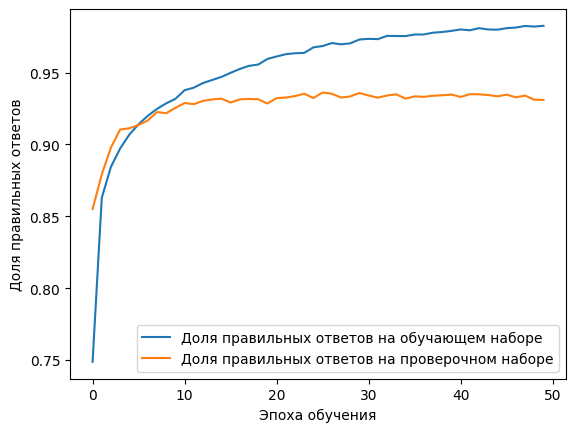

In [57]:
plt.plot(history.history['accuracy'], 
         label='Доля правильных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля правильных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля правильных ответов')
plt.legend()
plt.show()

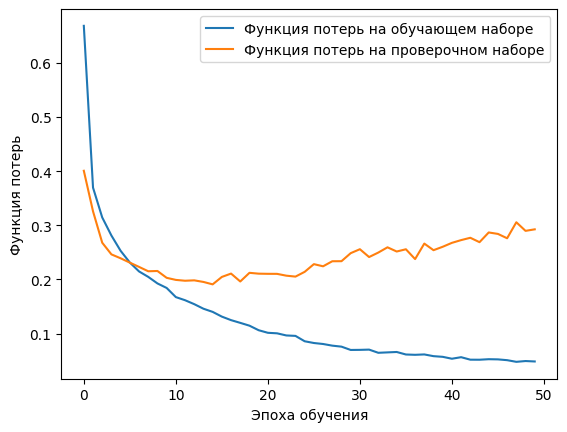

In [58]:
plt.plot(history.history['loss'], 
         label='Функция потерь на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Функция потерь на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Функция потерь')
plt.legend()
plt.show()

## Оценка качества обучения

Проверка качества работы на наборе данных для тестирования

In [51]:
scores = model.evaluate(x_test, y_test, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9278 - loss: 0.3082


In [52]:
print("Доля правильных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля правильных ответов на тестовых данных, в процентах: 92.78
